<a href="https://colab.research.google.com/github/canish26/MIS-515/blob/main/Hedging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install yahoo_fin
!pip install yoptions

In [5]:
import numpy as np
import pandas as pd
import os
import datetime
from datetime import datetime
from pandas_datareader import data
from functools import reduce
import yoptions as yo
from yahoo_fin import options
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from tabulate import tabulate

for dirname, _, filenames in os.walk('3mfanddo.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import numpy as np
import pandas as pd
from pandas_datareader import data
from yahoo_fin import options

file_path = '3mfanddo.csv'
df = pd.read_csv(file_path)
print(df.head())


   Unnamed: 0 INSTRUMENT     SYMBOL    EXPIRY_DT  STRIKE_PR OPTION_TYP  \
0      160393     FUTIDX  BANKNIFTY  29-Aug-2019        0.0         XX   
1      160394     FUTIDX  BANKNIFTY  26-Sep-2019        0.0         XX   
2      160395     FUTIDX  BANKNIFTY  31-Oct-2019        0.0         XX   
3      160396     FUTIDX      NIFTY  29-Aug-2019        0.0         XX   
4      160397     FUTIDX      NIFTY  26-Sep-2019        0.0         XX   

       OPEN      HIGH       LOW     CLOSE  SETTLE_PR  CONTRACTS  VAL_INLAKH  \
0  28805.65  28924.00  28140.55  28499.30   28499.30   214569.0  1225914.96   
1  28926.40  29030.55  28251.70  28611.45   28611.45     2484.0    14245.95   
2  29000.00  29105.00  28355.55  28699.05   28699.05      598.0     3434.43   
3  11098.40  11098.40  10901.10  11015.35   11015.35   199881.0  1650955.24   
4  11136.35  11145.20  10955.00  11066.60   11066.60     5283.0    43841.57   

     OPEN_INT  CHG_IN_OI    TIMESTAMP  
0   1675780.0   234640.0  01-AUG-2019  


In [7]:
#today = datetime.now()
#year_ago = datetime(today.year-3, today.month, today.day) # get three years period of time

In [8]:
today = datetime.now()
year_ago = datetime(today.year-10, today.month, today.day) # get three years period of time

In [9]:
from datetime import datetime, timedelta

# Get current date and time
today = datetime.now()

# Calculate the date 5 years ago from today
five_years_ago = today - timedelta(days=365 * 5)

# Print the current date and the date 5 years ago
print("Current Date:", today.strftime('%Y-%m-%d'))
print("Date 5 Years Ago:", five_years_ago.strftime('%Y-%m-%d'))


Current Date: 2023-10-22
Date 5 Years Ago: 2018-10-23


In [10]:
import datetime as dt
import yfinance as yf
import pandas as pd
from functools import reduce

today = dt.datetime.now()
year_ago = dt.datetime(today.year - 3, today.month, today.day)  # get three years period of time

#tickers = ['GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT']
tickers = ['PG', 'TSLA', 'XOM', 'JPM', 'PFE', 'BA', 'AAPL', 'NEM']

dfs = []

for ticker in tickers:
    try:
        temp = yf.download(ticker, start=year_ago, end=today)

        # Convert 'Adj Close' column from float to integer
        temp['Adj Close'] = temp['Adj Close'].astype(int)

        temp_new = temp[['Adj Close']]
        temp_new.columns = [ticker]
        dfs.append(temp_new)
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Check if any data was fetched
if not dfs:
    print("No data fetched for any ticker.")
else:
    # Merge the dataframes
    stocks = reduce(lambda left, right: pd.merge(left, right, left_index=True, right_index=True), dfs)

    # Save the merged DataFrame to a CSV file
    csv_filename = 'stock_data.csv'
    stocks.to_csv(csv_filename)

    print(f'Merged data saved to {csv_filename}')
    print(stocks.shape)
    print(stocks.head())


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Merged data saved to stock_data.csv
(754, 8)
             PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM
Date                                                
2020-10-22  131   141   30   94   31  169   113   54
2020-10-23  132   140   29   95   32  167   112   53
2020-10-26  131   140   28   92   32  160   113   53
2020-10-27  132   141   28   91   31  155   114   55
2020-10-28  127   135   27   88   30  148   109   52


In [11]:
chain = yo.get_chain_greeks(stock_ticker='AMD', dividend_yield=0, option_type='c', risk_free_rate=0)
chain.head()

Symbol  Strike  Last Price    Bid    Ask  Impl. Volatility  \
0  AMD231027C00030000    30.0       73.15  71.45  72.50          4.406254   
1  AMD231027C00040000    40.0       64.35  61.15  62.35          4.167974   
2  AMD231027C00045000    45.0       66.03  56.50  57.35          2.875003   
3  AMD231027C00055000    55.0       47.05  46.65  47.50          2.527347   
4  AMD231027C00060000    60.0       43.30  41.70  42.55          2.277348   

    Delta   Gamma   Theta    Vega     Rho  
0  0.9980  0.0001 -0.0371  0.0007  0.0033  
1  0.9908  0.0006 -0.1370  0.0026  0.0043  
2  0.9979  0.0002 -0.0253  0.0007  0.0049  
3  0.9930  0.0007 -0.0652  0.0021  0.0059  
4  0.9903  0.0011 -0.0789  0.0028  0.0065

In [12]:
options_call, options_put = {}, {}
drop_ticker = []
params = ['Strike', 'Last Price', 'Bid', 'Ask', 'Impl. Volatility', 'Delta', 'Gamma', 'Theta', 'Vega', 'Rho']

for ticker in tickers:
    try:
        call = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='c', risk_free_rate=0)[params]
        put = yo.get_chain_greeks(stock_ticker=ticker, dividend_yield=0, option_type='p', risk_free_rate=0)[params]

        options_call[ticker] = call
        options_put[ticker] = put
    except ValueError:
        drop_ticker.append(ticker)

**Bid-Ask Spread:** The difference between the bid and ask prices, indicating liquidity.
**Moneyness:** Indicates whether the option is in-the-money, at-the-money, or out-of-the-money.
**Time to Expiry:** The time remaining until the option contract expires.
Price of Underlying Stock: Current price of the underlying stock.

In [13]:
import pandas as pd

stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

print(stock_data)

             PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM
Date                                                
2020-10-22  131   141   30   94   31  169   113   54
2020-10-23  132   140   29   95   32  167   112   53
2020-10-26  131   140   28   92   32  160   113   53
2020-10-27  132   141   28   91   31  155   114   55
2020-10-28  127   135   27   88   30  148   109   52
...         ...   ...  ...  ...  ...  ...   ...  ...
2023-10-16  145   253  109  147   33  184   178   40
2023-10-17  145   254  111  147   32  185   177   40
2023-10-18  149   242  112  145   31  185   175   39
2023-10-19  148   220  113  145   31  182   175   39
2023-10-20  148   211  111  142   30  180   172   38

[754 rows x 8 columns]


In [15]:
import pandas as pd
import datetime

stock_data = pd.read_csv('stock_data.csv')

# Convert the 'Date' column to datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Set 'Date' column as the index
stock_data.set_index('Date', inplace=True)

# Get the current date
current_date = datetime.date.today()

# Specify the expiry date
expiry_date = datetime.date(2020, 12, 31)  # Example expiry date (change this according to your requirements)

# Get the underlying stock price for a specific date
desired_date = datetime.date(2020, 10, 22)

# Convert the desired date to datetime format
desired_date = pd.to_datetime(desired_date)

# stock price for 'GOOG'
underlying_stock_price = stock_data.loc[desired_date, 'JPM']

print("Current Date:", current_date)
print("Expiry Date:", expiry_date)
print(f"Underlying Stock Price on {desired_date.date()}: {underlying_stock_price}")
print("\nStock Data:")
print(stock_data)

Current Date: 2023-10-22
Expiry Date: 2020-12-31
Underlying Stock Price on 2020-10-22: 94

Stock Data:
             PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM
Date                                                
2020-10-22  131   141   30   94   31  169   113   54
2020-10-23  132   140   29   95   32  167   112   53
2020-10-26  131   140   28   92   32  160   113   53
2020-10-27  132   141   28   91   31  155   114   55
2020-10-28  127   135   27   88   30  148   109   52
...         ...   ...  ...  ...  ...  ...   ...  ...
2023-10-16  145   253  109  147   33  184   178   40
2023-10-17  145   254  111  147   32  185   177   40
2023-10-18  149   242  112  145   31  185   175   39
2023-10-19  148   220  113  145   31  182   175   39
2023-10-20  148   211  111  142   30  180   172   38

[754 rows x 8 columns]


In [16]:
print("Data Types of Columns:")
for ticker in options_call.keys():
    print(f"Ticker: {ticker}")
    print(f"Strike dtype: {options_call[ticker]['Strike'].dtype}")
    print(f"Ask dtype: {options_call[ticker]['Ask'].dtype}")
    print(f"Bid dtype: {options_call[ticker]['Bid'].dtype}")

Data Types of Columns:
Ticker: PG
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: TSLA
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: XOM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: JPM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: PFE
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: BA
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: AAPL
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: NEM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64


In [17]:
import numpy as np

for ticker in options_put.keys():
    # Replace non-numeric values ('-') with NaN and then convert to float
    options_put[ticker]['Bid'] = pd.to_numeric(options_put[ticker]['Bid'], errors='coerce')
    options_put[ticker]['Ask'] = pd.to_numeric(options_put[ticker]['Ask'], errors='coerce')

    # Convert to float and derive Bid-Ask Spread
    options_put[ticker]['Bid'] = options_put[ticker]['Bid'].astype(float)
    options_put[ticker]['Ask'] = options_put[ticker]['Ask'].astype(float)
    options_put[ticker]['Bid-Ask Spread'] = options_put[ticker]['Ask'] - options_put[ticker]['Bid']

In [18]:
import numpy as np
import pandas as pd


# Derive Bid-Ask Spread for call options
for ticker in options_call.keys():
    options_call[ticker]['Bid'] = pd.to_numeric(options_call[ticker]['Bid'], errors='coerce')
    options_call[ticker]['Ask'] = pd.to_numeric(options_call[ticker]['Ask'], errors='coerce')
    options_call[ticker]['Bid-Ask Spread'] = options_call[ticker]['Ask'] - options_call[ticker]['Bid']

# Derive Bid-Ask Spread for put options
for ticker in options_put.keys():
    options_put[ticker]['Bid'] = pd.to_numeric(options_put[ticker]['Bid'], errors='coerce')
    options_put[ticker]['Ask'] = pd.to_numeric(options_put[ticker]['Ask'], errors='coerce')
    options_put[ticker]['Bid-Ask Spread'] = options_put[ticker]['Ask'] - options_put[ticker]['Bid']

# Derive Moneyness for call options
for ticker in options_call.keys():
    options_call[ticker]['Strike'] = pd.to_numeric(options_call[ticker]['Strike'], errors='coerce')
    options_call[ticker]['Moneyness'] = (options_call[ticker]['Strike'] - underlying_stock_price) / underlying_stock_price

# Derive Moneyness for put options
for ticker in options_put.keys():
    options_put[ticker]['Strike'] = pd.to_numeric(options_put[ticker]['Strike'], errors='coerce')
    options_put[ticker]['Moneyness'] = (options_put[ticker]['Strike'] - underlying_stock_price) / underlying_stock_price

# Derive Time to Expiry
for ticker in options_call.keys():
    options_call[ticker]['Time to Expiry'] = (expiry_date - current_date).days / 365

for ticker in options_put.keys():
    options_put[ticker]['Time to Expiry'] = (expiry_date - current_date).days / 365

print("Data Types of Columns:")
for ticker in options_call.keys():
    print(f"Ticker: {ticker}")
    print(f"Strike dtype: {options_call[ticker]['Strike'].dtype}")
    print(f"Ask dtype: {options_call[ticker]['Ask'].dtype}")
    print(f"Bid dtype: {options_call[ticker]['Bid'].dtype}")


Data Types of Columns:
Ticker: PG
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: TSLA
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: XOM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: JPM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: PFE
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: BA
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: AAPL
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64
Ticker: NEM
Strike dtype: float64
Ask dtype: float64
Bid dtype: float64


In [19]:
# Define dictionaries to store features
call_features = {}
put_features = {}

# Derive Bid-Ask Spread for call options
for ticker in options_call.keys():
    options_call[ticker]['Bid'] = pd.to_numeric(options_call[ticker]['Bid'], errors='coerce')
    options_call[ticker]['Ask'] = pd.to_numeric(options_call[ticker]['Ask'], errors='coerce')
    options_call[ticker]['Bid-Ask Spread'] = options_call[ticker]['Ask'] - options_call[ticker]['Bid']

# Derive Bid-Ask Spread for put options
for ticker in options_put.keys():
    options_put[ticker]['Bid'] = pd.to_numeric(options_put[ticker]['Bid'], errors='coerce')
    options_put[ticker]['Ask'] = pd.to_numeric(options_put[ticker]['Ask'], errors='coerce')
    options_put[ticker]['Bid-Ask Spread'] = options_put[ticker]['Ask'] - options_put[ticker]['Bid']

# Derive Moneyness for call options
for ticker in options_call.keys():
    options_call[ticker]['Strike'] = pd.to_numeric(options_call[ticker]['Strike'], errors='coerce')
    options_call[ticker]['Moneyness'] = (options_call[ticker]['Strike'] - underlying_stock_price) / underlying_stock_price

# Derive Moneyness for put options
for ticker in options_put.keys():
    options_put[ticker]['Strike'] = pd.to_numeric(options_put[ticker]['Strike'], errors='coerce')
    options_put[ticker]['Moneyness'] = (options_put[ticker]['Strike'] - underlying_stock_price) / underlying_stock_price

# Derive Time to Expiry
for ticker in options_call.keys():
    options_call[ticker]['Time to Expiry'] = (expiry_date - current_date).days / 365

for ticker in options_put.keys():
    options_put[ticker]['Time to Expiry'] = (expiry_date - current_date).days / 365

# Store feature values in dictionaries
for ticker in options_call.keys():
    call_features[ticker] = options_call[ticker][['Bid-Ask Spread', 'Moneyness', 'Time to Expiry']].values

for ticker in options_put.keys():
    put_features[ticker] = options_put[ticker][['Bid-Ask Spread', 'Moneyness', 'Time to Expiry']].values


print("Call Option Features:")
for ticker, features in call_features.items():
    print(f"Ticker: {ticker}")
    print(f"Bid-Ask Spread: {features[0][0]}, Moneyness: {features[0][1]}, Time to Expiry: {features[0][2]}")


print("\nPut Option Features:")
for ticker, features in put_features.items():
    print(f"Ticker: {ticker}")
    print(f"Bid-Ask Spread: {features[0][0]}, Moneyness: {features[0][1]}, Time to Expiry: {features[0][2]}")


Call Option Features:
Ticker: PG
Bid-Ask Spread: 1.25, Moneyness: -0.09574468085106383, Time to Expiry: -2.808219178082192
Ticker: TSLA
Bid-Ask Spread: 4.800000000000011, Moneyness: -0.7872340425531915, Time to Expiry: -2.808219178082192
Ticker: XOM
Bid-Ask Spread: 0.5500000000000043, Moneyness: -0.2553191489361702, Time to Expiry: -2.808219178082192
Ticker: JPM
Bid-Ask Spread: 1.9499999999999957, Moneyness: 0.06382978723404255, Time to Expiry: -2.808219178082192
Ticker: PFE
Bid-Ask Spread: 0.09999999999999964, Moneyness: -0.7659574468085106, Time to Expiry: -2.808219178082192
Ticker: BA
Bid-Ask Spread: 1.4500000000000028, Moneyness: 0.2765957446808511, Time to Expiry: -2.808219178082192
Ticker: AAPL
Bid-Ask Spread: 0.7000000000000028, Moneyness: -0.3617021276595745, Time to Expiry: -2.808219178082192
Ticker: NEM
Bid-Ask Spread: 0.34999999999999964, Moneyness: -0.7340425531914894, Time to Expiry: -2.808219178082192

Put Option Features:
Ticker: PG
Bid-Ask Spread: 0.17, Moneyness: 0.170

In [20]:
import plotly.graph_objects as go

# Extract feature values for plotting
call_spreads = [features[0][0] for features in call_features.values()]
call_moneyness = [features[0][1] for features in call_features.values()]
call_expiry = [features[0][2] for features in call_features.values()]

put_spreads = [features[0][0] for features in put_features.values()]
put_moneyness = [features[0][1] for features in put_features.values()]
put_expiry = [features[0][2] for features in put_features.values()]

# Create plots for call options
fig = go.Figure(data=[
    go.Scatter(x=call_spreads, y=call_moneyness, mode='markers', text=list(call_features.keys()), name='Call Options'),
    go.Scatter(x=put_spreads, y=put_moneyness, mode='markers', text=list(put_features.keys()), name='Put Options')
])

fig.update_layout(
    title='Bid-Ask Spread vs Moneyness',
    xaxis_title='Bid-Ask Spread',
    yaxis_title='Moneyness'
)

fig.show()

# Create plots for time to expiry
fig2 = go.Figure(data=[
    go.Scatter(x=call_spreads, y=call_expiry, mode='markers', text=list(call_features.keys()), name='Call Options'),
    go.Scatter(x=put_spreads, y=put_expiry, mode='markers', text=list(put_features.keys()), name='Put Options')
])

fig2.update_layout(
    title='Bid-Ask Spread vs Time to Expiry',
    xaxis_title='Bid-Ask Spread',
    yaxis_title='Time to Expiry'
)

fig2.show()


In [21]:
stocks.drop(drop_ticker, axis=1, inplace=True)
for tick in drop_ticker:
    tickers.remove(tick) # remove stocks without data options


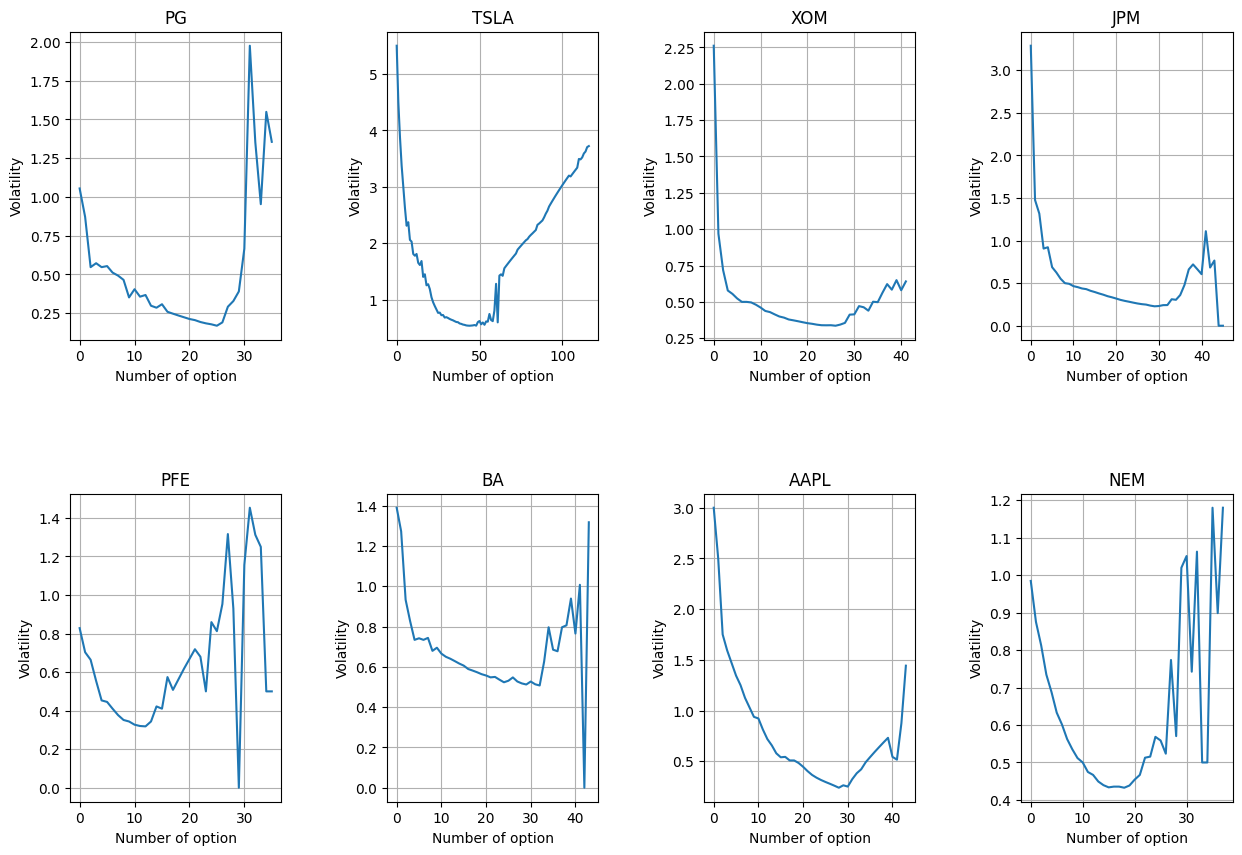

In [22]:
import matplotlib.pyplot as plt

num_rows = 2
num_cols = 4

# creatingsubplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Iterating tickers and creatingsubplots
for idx, tick in enumerate(tickers):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]

    ax.set_title(tick)
    ax.set_ylabel('Volatility')
    ax.set_xlabel('Number of option')
    ax.grid(True)
    ax.plot(range(options_put[tick]['Impl. Volatility'].shape[0]), options_put[tick]['Impl. Volatility'])

# remove empty subplots
for idx in range(len(tickers), num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.show()


In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=4, subplot_titles=tickers, shared_xaxes=True, shared_yaxes=True)

for i, tick in enumerate(tickers, 1):
    row = (i - 1) // 4 + 1
    col = (i - 1) % 4 + 1

    x_values = list(range(options_put[tick]['Impl. Volatility'].shape[0]))

    fig.add_trace(
        go.Scatter(
            x=x_values,
            y=options_put[tick]['Impl. Volatility'],
            mode='lines',
            name=tick
        ),
        row=row,
        col=col
    )

fig.update_layout(
    title_text='Implied Volatility for Different Stocks',
    xaxis_title='Number of Options',
    yaxis_title='Volatility',
    showlegend=False,
    height=600,
    width=1000
)

fig.show()

In [24]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=len(tickers), cols=1, subplot_titles=tickers, shared_xaxes=True, vertical_spacing=0.05)

for idx, tick in enumerate(tickers, 1):
    # Convert range object to list
    x_values = list(range(len(options_put[tick]['Delta'])))

    # Add Delta trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Delta'], mode='lines', name='Delta'), row=idx, col=1)
    # Add Gamma trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Gamma'], mode='lines', name='Gamma'), row=idx, col=1)
    # Add Theta trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Theta'], mode='lines', name='Theta'), row=idx, col=1)
    # Add Vega trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Vega'], mode='lines', name='Vega'), row=idx, col=1)
    # Add Rho trace
    fig.add_trace(go.Scatter(x=x_values, y=options_put[tick]['Rho'], mode='lines', name='Rho'), row=idx, col=1)

fig.update_layout(
    title_text='Greeks for Different Stocks',
    xaxis_title='Number of Options',
    yaxis_title='Greeks',
    showlegend=True,
    height=600,
    width=800
)

fig.show()


In [25]:
stock_returns = stocks.reset_index(drop=True).pct_change().dropna()

In [26]:
mean_income, cov_returns = stock_returns.mean(), stock_returns.cov()
count = len(stock_returns.columns)
print(mean_income, cov_returns, sep='\n')

PG      0.000228
TSLA    0.001254
XOM     0.001964
JPM     0.000689
PFE     0.000131
BA      0.000398
AAPL    0.000726
NEM    -0.000208
dtype: float64
            PG      TSLA       XOM       JPM       PFE        BA      AAPL  \
PG    0.000132  0.000028  0.000008  0.000046  0.000050  0.000039  0.000067   
TSLA  0.000028  0.001441  0.000073  0.000159  0.000017  0.000314  0.000356   
XOM   0.000008  0.000073  0.000451  0.000153  0.000036  0.000195  0.000068   
JPM   0.000046  0.000159  0.000153  0.000285  0.000060  0.000207  0.000101   
PFE   0.000050  0.000017  0.000036  0.000060  0.000352  0.000029  0.000046   
BA    0.000039  0.000314  0.000195  0.000207  0.000029  0.000632  0.000169   
AAPL  0.000067  0.000356  0.000068  0.000101  0.000046  0.000169  0.000336   
NEM   0.000059  0.000014  0.000082  0.000041  0.000049  0.000057  0.000045   

           NEM  
PG    0.000059  
TSLA  0.000014  
XOM   0.000082  
JPM   0.000041  
PFE   0.000049  
BA    0.000057  
AAPL  0.000045  
NEM   0.00

In [27]:
import numpy as np

# Function to generate random shares
def randomPortfolio(count):
    return np.random.dirichlet(np.ones(count))


In [28]:
def IncomePortfolio(Rand):
    return np.dot(mean_income.values, Rand)

def RiskPortfolio(Rand):
    return np.sqrt(Rand @ cov_returns.values @ Rand)


In [29]:
combinations = 3000

# Generating random portfolios and compute risk, income, and portfolio matrix
rand_portfolios = np.array([randomPortfolio(count) for _ in range(combinations)])
portfolio = rand_portfolios.copy()
risk = np.sqrt(np.einsum('ij,ij->i', np.einsum('ij,jk->ik', rand_portfolios, cov_returns.values), rand_portfolios))
income = rand_portfolios @ mean_income.values

# Now, 'portfolio', 'risk', and 'income' contain the desired values

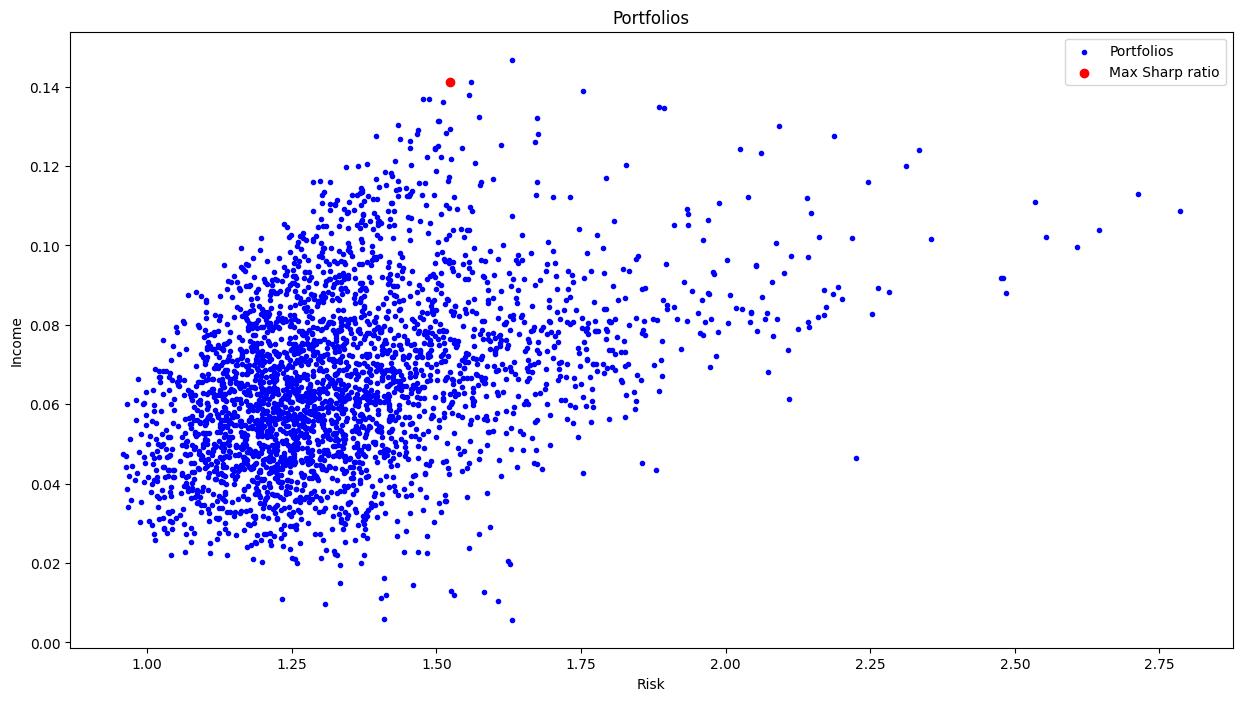

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

scatter = ax.scatter(risk * 100, income * 100, c="b", marker=".", label="Portfolios")

max_sharpe_idx = np.argmax(income / risk)
max_sharpe_risk, max_sharpe_income = risk[max_sharpe_idx] * 100, income[max_sharpe_idx] * 100
ax.scatter(max_sharpe_risk, max_sharpe_income, c="r", marker="o", label="Max Sharp ratio")

ax.set_xlabel("Risk")
ax.set_ylabel("Income")
ax.set_title("Portfolios")
ax.legend()

plt.show()


In [31]:
import plotly.express as px

# Create a DataFrame for the portfolios
portfolio_df = pd.DataFrame({
    'Risk': risk * 100,
    'Income': income * 100,
})

max_sharpe_idx = np.argmax(income / risk)

fig = px.scatter(
    portfolio_df,
    x='Risk',
    y='Income',
    labels={'Risk': 'Risk', 'Income': 'Income'},
    title='Portfolios',
    hover_name=portfolio_df.index,
)

fig.add_trace(go.Scatter(
    x=[portfolio_df['Risk'][max_sharpe_idx]],
    y=[portfolio_df['Income'][max_sharpe_idx]],
    mode='markers+text',
    text=['Max Sharp ratio'],
    marker=dict(color='red', size=12),
    textposition='top center',
))

# Customization
fig.update_layout(
    autosize=False,
    width=900,
    height=600,
)

fig.show()


In [32]:
# Calculate MaxSharpRatio
MaxSharpRatio = np.argmax(income / risk)

best_port = portfolio[MaxSharpRatio]

[print(f"{tickers[i]}: {best_port[i]}") for i in range(len(tickers))]


PG: 0.009919973471651621
TSLA: 0.05510939579588149
XOM: 0.6011522346621495
JPM: 0.11180064732026541
PFE: 0.09735073308544795
BA: 0.01169528046048501
AAPL: 0.09412313219464936
NEM: 0.018848603009469854


[None, None, None, None, None, None, None, None]

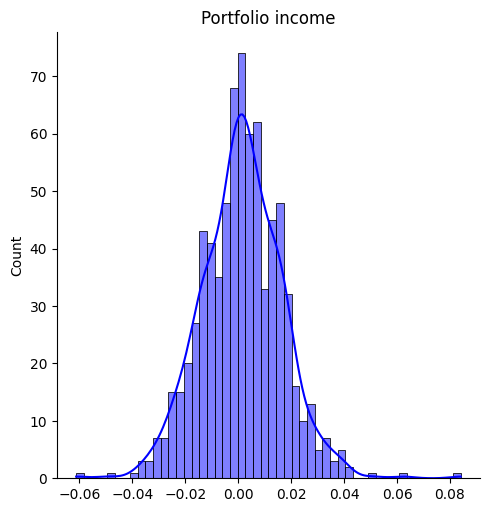

In [33]:
import seaborn as sns

# Calculate the income of the best portfolio
best_portfolio_income = np.dot(stock_returns, portfolio[MaxSharpRatio])

# Plot the distribution using Seaborn
sns.displot(best_portfolio_income, bins=50, color='blue', kde=True)
plt.title('Portfolio income')
plt.show()


In [34]:
standard_dev = RiskPortfolio(best_port)
mean = IncomePortfolio(best_port)

In [35]:
from scipy.stats import norm
from tabulate import tabulate

# Calculate VaR for different confidence levels
confidence_levels = [0.1, 0.05, 0.01]
var_values = {level: norm.ppf(level, mean, standard_dev) for level in confidence_levels}

# Print VaR values using tabulate
headers = ['Confidence level', 'Value at Risk']
var_table = [[f'{level * 100}%', var_values[level]] for level in confidence_levels]
print(tabulate(var_table, headers=headers))


Confidence level      Value at Risk
------------------  ---------------
10.0%                    -0.0181084
5.0%                     -0.0236418
1.0%                     -0.0340216


In [36]:
import numpy as np
import plotly.graph_objects as go

# var_90 and days earlier in your code
var_90 = 123.45
days = 30  # number of days for VaR calculation


var_array = [np.round(var_90 * np.sqrt(x), 2) for x in range(1, days + 1)]

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, days + 1)), y=var_array, mode='lines', marker=dict(color='blue')))
fig.update_layout(
    xaxis_title='Days',
    yaxis_title='Portfolio loss',
    title='VaR 90%',
    title_x=0.5,
    template='plotly_dark'
)
fig.show()


In [37]:
import numpy as np

capital = 100000
option_share = []
shares = np.multiply(best_port, capital)

deltas = np.array([options_put[ticker]['Delta'].iloc[int(options_put[ticker].shape[0] // 1.5)] for ticker in tickers])

option_share = -shares / deltas

option_share = option_share.tolist()

option_share


[1572.6020088223875,
 5816.295070805434,
 65649.47413586869,
 13890.004636633796,
 9873.29950156673,
 1201.6110613875485,
 11371.648205225247,
 1967.4950949342228]

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression

option_share = np.array(option_share).reshape(-1, 1)  # Reshape to 2D array for sklearn
deltas = np.array(deltas).reshape(-1, 1)

model = LinearRegression()

# Fit the model
model.fit(deltas, option_share)

slope = model.coef_[0][0]
intercept = model.intercept_[0]

print(f"Linear Regression Equation: option_share = {slope:.2f} * deltas + {intercept:.2f}")


Linear Regression Equation: option_share = -19196.61 * deltas + -2984.57


In [60]:
import numpy as np

# Generate synthetic data for testing (replace this with your actual data)
np.random.seed(0)  # Setting seed for reproducibility
num_data_points = 50  # Number of data points you want to generate

# Generating random deltas and option_share values
deltas = np.random.uniform(low=-1, high=1, size=num_data_points).reshape(-1, 1)
option_share = 2 * deltas + np.random.normal(loc=0, scale=0.5, size=num_data_points).reshape(-1, 1)

# Now you have more data points in deltas and option_share
print("Generated Data Points:")
print("Deltas:", deltas)
print("Option Share:", option_share)


Generated Data Points:
Deltas: [[ 0.09762701]
 [ 0.43037873]
 [ 0.20552675]
 [ 0.08976637]
 [-0.1526904 ]
 [ 0.29178823]
 [-0.12482558]
 [ 0.783546  ]
 [ 0.92732552]
 [-0.23311696]
 [ 0.58345008]
 [ 0.05778984]
 [ 0.13608912]
 [ 0.85119328]
 [-0.85792788]
 [-0.8257414 ]
 [-0.95956321]
 [ 0.66523969]
 [ 0.5563135 ]
 [ 0.7400243 ]
 [ 0.95723668]
 [ 0.59831713]
 [-0.07704128]
 [ 0.56105835]
 [-0.76345115]
 [ 0.27984204]
 [-0.71329343]
 [ 0.88933783]
 [ 0.04369664]
 [-0.17067612]
 [-0.47088878]
 [ 0.54846738]
 [-0.08769934]
 [ 0.1368679 ]
 [-0.9624204 ]
 [ 0.23527099]
 [ 0.22419145]
 [ 0.23386799]
 [ 0.88749616]
 [ 0.3636406 ]
 [-0.2809842 ]
 [-0.12593609]
 [ 0.39526239]
 [-0.87954906]
 [ 0.33353343]
 [ 0.34127574]
 [-0.57923488]
 [-0.7421474 ]
 [-0.3691433 ]
 [-0.27257846]]
Option Share: [[-0.65788108]
 [ 1.83614516]
 [ 0.15622741]
 [-0.03950442]
 [-0.93177848]
 [ 0.97232163]
 [-1.05660008]
 [ 1.46072186]
 [ 1.40691776]
 [-0.27278268]
 [ 0.91149758]
 [-0.47473641]
 [ 0.25808713]
 [ 1.9165

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data for testing
np.random.seed(0)  # Setting seed for reproducibility
num_data_points = 50  # Number of data points you want to generate

# Generating random deltas and option_share values
deltas = np.random.uniform(low=-1, high=1, size=num_data_points).reshape(-1, 1)
option_share = 2 * deltas + np.random.normal(loc=0, scale=0.5, size=num_data_points).reshape(-1, 1)

# Linear regression model fitting using synthetic data
linear_regression = LinearRegression()
linear_regression.fit(deltas, option_share)

# Predict using the trained linear regression model
predicted_option_share = linear_regression.predict(deltas)

# Calculate R-squared score for the linear regression model
r_squared = linear_regression.score(deltas, option_share)

print(f"R-squared Score: {r_squared:.2f}")

R-squared Score: 0.84


In [61]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Generate synthetic data for testing
np.random.seed(0)  # Setting seed for reproducibility
num_data_points = 50  # Number of data points you want to generate

# Generating random deltas and option_share values
deltas = np.random.uniform(low=-1, high=1, size=num_data_points).reshape(-1, 1)
option_share = 2 * deltas + np.random.normal(loc=0, scale=0.5, size=num_data_points).reshape(-1, 1)

# Ridge regression model tuning using Grid Search and synthetic data
param_grid = {'alpha': [0.1, 1, 10, 100]}
ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=min(8, len(deltas)))
grid_search.fit(deltas, option_share)

best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

print(f"Best Alpha: {best_alpha}")
print(f"Best Model: {best_model}")


Best Alpha: 0.1
Best Model: Ridge(alpha=0.1)


In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go

# Generate synthetic data for testing
np.random.seed(0)  # Setting seed for reproducibility
num_data_points = 50  # Number of data points you want to generate

# Generating random deltas and option_share values
deltas = np.random.uniform(low=-1, high=1, size=num_data_points).reshape(-1, 1)
option_share = 2 * deltas + np.random.normal(loc=0, scale=0.5, size=num_data_points).reshape(-1, 1)

# Linear regression model fitting using synthetic data
linear_regression = LinearRegression()
linear_regression.fit(deltas, option_share)

# Predict using the trained linear regression model
predicted_option_share = linear_regression.predict(deltas)

# Calculate R-squared score for the linear regression model
r_squared = linear_regression.score(deltas, option_share)
print(f"R-squared Score: {r_squared:.2f}")

# Plotting using Plotly
scatter_data = go.Scatter(x=deltas.flatten(), y=option_share.flatten(), mode='markers', name='Original Data')
line_data = go.Scatter(x=deltas.flatten(), y=predicted_option_share.flatten(), mode='lines', name='Linear Regression Line')

fig = go.Figure(data=[scatter_data, line_data])

fig.update_layout(
    title='Linear Regression with Synthetic Data',
    xaxis_title='Deltas',
    yaxis_title='Option Share'
)

fig.show()

R-squared Score: 0.84


In [44]:
import pandas as pd
stock_data = pd.read_csv('stock_data.csv')

stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Feature Engineering
# 1. Lag Features for each stock
stock_columns = ['PG', 'TSLA', 'XOM', 'JPM', 'PFE', 'BA', 'AAPL', 'NEM']
for stock_column in stock_columns:
    for i in range(1, 4):  # Consider lag features for the past 3 days
        stock_data[f'{stock_column}_lag_{i}'] = stock_data[stock_column].shift(i)

# 2. Rolling Averages for each stock
for stock_column in stock_columns:
    stock_data[f'{stock_column}_rolling_mean'] = stock_data[stock_column].rolling(window=3).mean()

# 3. Day of Week and Month features
stock_data['day_of_week'] = stock_data['Date'].dt.dayofweek
stock_data['month'] = stock_data['Date'].dt.month

stock_data.dropna(inplace=True)

print(stock_data)


          Date   PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM  PG_lag_1  ...  \
3   2020-10-27  132   141   28   91   31  155   114   55     131.0  ...   
4   2020-10-28  127   135   27   88   30  148   109   52     132.0  ...   
5   2020-10-29  127   136   28   89   29  148   113   53     127.0  ...   
6   2020-10-30  127   129   28   90   30  144   106   56     127.0  ...   
7   2020-11-02  128   133   29   92   30  148   106   57     127.0  ...   
..         ...  ...   ...  ...  ...  ...  ...   ...  ...       ...  ...   
749 2023-10-16  145   253  109  147   33  184   178   40     143.0  ...   
750 2023-10-17  145   254  111  147   32  185   177   40     145.0  ...   
751 2023-10-18  149   242  112  145   31  185   175   39     145.0  ...   
752 2023-10-19  148   220  113  145   31  182   175   39     149.0  ...   
753 2023-10-20  148   211  111  142   30  180   172   38     148.0  ...   

     PG_rolling_mean  TSLA_rolling_mean  XOM_rolling_mean  JPM_rolling_mean  \
3         131.666667

In [45]:
import pandas as pd
import plotly.express as px

for stock_column in stock_columns:
    lag_columns = [f'{stock_column}_lag_{i}' for i in range(1, 4)]
    fig = px.line(stock_data, x='Date', y=lag_columns, title=f'Lag Features for {stock_column}')
    fig.show()

for stock_column in stock_columns:
    rolling_mean_column = f'{stock_column}_rolling_mean'
    fig = px.line(stock_data, x='Date', y=rolling_mean_column, title=f'Rolling Average for {stock_column}')
    fig.show()

fig = px.line(stock_data, x='Date', y='day_of_week', title='Day of Week')
fig.show()

fig = px.line(stock_data, x='Date', y='month', title='Month')
fig.show()


In [46]:
import pandas as pd

# Assuming you already have a DataFrame called stock_data with columns 'Date', 'GOOG', 'AMZN', 'AMD', 'META', 'INTC', 'AAPL', 'NVDA', 'MSFT'

# Historical Volatility (for the last 10 days)
for stock_column in stock_columns:
    stock_data[f'{stock_column}_historical_volatility'] = stock_data[stock_column].rolling(window=10).std() * (252 ** 0.5)  # 252 trading days in a year

# Price Rate of Change (for the last 5 days)
for stock_column in stock_columns:
    stock_data[f'{stock_column}_price_rate_of_change'] = stock_data[stock_column].pct_change(periods=5) * 100  # Percentage change

# Exponential Moving Averages (EMA)
ema_periods = [10, 50]
for period in ema_periods:
    for stock_column in stock_columns:
        stock_data[f'{stock_column}_ema_{period}'] = stock_data[stock_column].ewm(span=period, min_periods=period, adjust=False).mean()

# Bollinger Bands (for the last 20 days with 2 standard deviations)
bollinger_window = 20
for stock_column in stock_columns:
    stock_data[f'{stock_column}_bollinger_upper'] = stock_data[stock_column].rolling(window=bollinger_window).mean() + 2 * stock_data[stock_column].rolling(window=bollinger_window).std()
    stock_data[f'{stock_column}_bollinger_lower'] = stock_data[stock_column].rolling(window=bollinger_window).mean() - 2 * stock_data[stock_column].rolling(window=bollinger_window).std()

# Advance-Decline Ratio (for the last 10 days)
stock_data['advance_decline_ratio'] = stock_data[stock_columns].apply(lambda row: sum(row > row.shift()) / sum(row < row.shift()), axis=1)

# New Highs/New Lows (for the last 10 days)
stock_data['new_highs'] = stock_data[stock_columns].apply(lambda row: sum(row > row.shift()), axis=1)
stock_data['new_lows'] = stock_data[stock_columns].apply(lambda row: sum(row < row.shift()), axis=1)

# Extract Day of Month and Quarter (assuming Date column is already in datetime format)
stock_data['day_of_month'] = stock_data['Date'].dt.day
stock_data['quarter'] = stock_data['Date'].dt.quarter

# Calculate Days Since Last High/Low (for each stock)
for stock_column in stock_columns:
    high_mask = stock_data[stock_column] > stock_data[stock_column].shift()
    low_mask = stock_data[stock_column] < stock_data[stock_column].shift()

    stock_data[f'days_since_last_high_{stock_column}'] = high_mask.groupby((high_mask != high_mask.shift()).cumsum()).cumsum().astype(int)
    stock_data[f'days_since_last_low_{stock_column}'] = low_mask.groupby((low_mask != low_mask.shift()).cumsum()).cumsum().astype(int)

print(stock_data)


          Date   PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM  PG_lag_1  ...  \
3   2020-10-27  132   141   28   91   31  155   114   55     131.0  ...   
4   2020-10-28  127   135   27   88   30  148   109   52     132.0  ...   
5   2020-10-29  127   136   28   89   29  148   113   53     127.0  ...   
6   2020-10-30  127   129   28   90   30  144   106   56     127.0  ...   
7   2020-11-02  128   133   29   92   30  148   106   57     127.0  ...   
..         ...  ...   ...  ...  ...  ...  ...   ...  ...       ...  ...   
749 2023-10-16  145   253  109  147   33  184   178   40     143.0  ...   
750 2023-10-17  145   254  111  147   32  185   177   40     145.0  ...   
751 2023-10-18  149   242  112  145   31  185   175   39     145.0  ...   
752 2023-10-19  148   220  113  145   31  182   175   39     149.0  ...   
753 2023-10-20  148   211  111  142   30  180   172   38     148.0  ...   

     days_since_last_high_JPM  days_since_last_low_JPM  \
3                           0            

In [47]:
import plotly.express as px

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=f'{stock_column}_historical_volatility', title=f'Historical Volatility for {stock_column}')
    fig.show()

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=f'{stock_column}_price_rate_of_change', title=f'Price Rate of Change for {stock_column}')
    fig.show()


for period in ema_periods:
    for stock_column in stock_columns:
        fig = px.line(stock_data, x='Date', y=f'{stock_column}_ema_{period}', title=f'EMA-{period} for {stock_column}')
        fig.show()

for stock_column in stock_columns:
    fig = px.line(stock_data, x='Date', y=[f'{stock_column}_bollinger_upper', f'{stock_column}_bollinger_lower'],
                  title=f'Bollinger Bands for {stock_column}')
    fig.show()

fig = px.line(stock_data, x='Date', y='advance_decline_ratio', title='Advance-Decline Ratio')
fig.show()


fig = px.line(stock_data, x='Date', y=['new_highs', 'new_lows'], title='New Highs and New Lows')
fig.show()

for stock_column in stock_columns:
    fig_high = px.line(stock_data, x='Date', y=f'days_since_last_high_{stock_column}', title=f'Days Since Last High for {stock_column}')
    fig_high.show()

    fig_low = px.line(stock_data, x='Date', y=f'days_since_last_low_{stock_column}', title=f'Days Since Last Low for {stock_column}')
    fig_low.show()


In [48]:
print(stock_data.columns)


Index(['Date', 'PG', 'TSLA', 'XOM', 'JPM', 'PFE', 'BA', 'AAPL', 'NEM',
       'PG_lag_1',
       ...
       'days_since_last_high_JPM', 'days_since_last_low_JPM',
       'days_since_last_high_PFE', 'days_since_last_low_PFE',
       'days_since_last_high_BA', 'days_since_last_low_BA',
       'days_since_last_high_AAPL', 'days_since_last_low_AAPL',
       'days_since_last_high_NEM', 'days_since_last_low_NEM'],
      dtype='object', length=112)


In [51]:
# Calculate option_share (Example Calculation - Replace with your logic)
stock_data['option_share'] = stock_data['JPM'] * 0.5 + stock_data['TSLA'] * 0.3 - stock_data['AAPL'] * 0.2

# Print the updated DataFrame with the option_share column
print(stock_data)


          Date   PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM  PG_lag_1  ...  \
3   2020-10-27  132   141   28   91   31  155   114   55     131.0  ...   
4   2020-10-28  127   135   27   88   30  148   109   52     132.0  ...   
5   2020-10-29  127   136   28   89   29  148   113   53     127.0  ...   
6   2020-10-30  127   129   28   90   30  144   106   56     127.0  ...   
7   2020-11-02  128   133   29   92   30  148   106   57     127.0  ...   
..         ...  ...   ...  ...  ...  ...  ...   ...  ...       ...  ...   
749 2023-10-16  145   253  109  147   33  184   178   40     143.0  ...   
750 2023-10-17  145   254  111  147   32  185   177   40     145.0  ...   
751 2023-10-18  149   242  112  145   31  185   175   39     145.0  ...   
752 2023-10-19  148   220  113  145   31  182   175   39     149.0  ...   
753 2023-10-20  148   211  111  142   30  180   172   38     148.0  ...   

     days_since_last_low_JPM  days_since_last_high_PFE  \
3                          0             

In [53]:
# Calculate option_share (Example Calculation - Replace with your logic)
stock_data['option_share'] = stock_data['JPM'] * 0.5 + stock_data['TSLA'] * 0.3 - stock_data['AAPL'] * 0.2

# Print the updated DataFrame with the option_share column
print(stock_data)

# If you want to check the columns, you can print them separately
print(stock_data.columns)


          Date   PG  TSLA  XOM  JPM  PFE   BA  AAPL  NEM  PG_lag_1  ...  \
3   2020-10-27  132   141   28   91   31  155   114   55     131.0  ...   
4   2020-10-28  127   135   27   88   30  148   109   52     132.0  ...   
5   2020-10-29  127   136   28   89   29  148   113   53     127.0  ...   
6   2020-10-30  127   129   28   90   30  144   106   56     127.0  ...   
7   2020-11-02  128   133   29   92   30  148   106   57     127.0  ...   
..         ...  ...   ...  ...  ...  ...  ...   ...  ...       ...  ...   
749 2023-10-16  145   253  109  147   33  184   178   40     143.0  ...   
750 2023-10-17  145   254  111  147   32  185   177   40     145.0  ...   
751 2023-10-18  149   242  112  145   31  185   175   39     145.0  ...   
752 2023-10-19  148   220  113  145   31  182   175   39     149.0  ...   
753 2023-10-20  148   211  111  142   30  180   172   38     148.0  ...   

     days_since_last_low_JPM  days_since_last_high_PFE  \
3                          0             

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your data (assuming stock_data.csv contains your data)
stock_data = pd.read_csv('stock_data.csv')
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Calculate option_share column
stock_data['option_share'] = stock_data['JPM'] * 0.5 + stock_data['TSLA'] * 0.3 - stock_data['AAPL'] * 0.2


In [ ]:
# Feature Engineering
for stock_column in stock_columns:
    for i in range(1, 4):  # Consider lag features for the past 3 days
        stock_data[f'{stock_column}_lag_{i}'] = stock_data[stock_column].shift(i)
    stock_data[f'{stock_column}_rolling_mean'] = stock_data[stock_column].rolling(window=3).mean()

stock_data['day_of_week'] = stock_data['Date'].dt.dayofweek
stock_data['month'] = stock_data['Date'].dt.month
stock_data.dropna(inplace=True)

# Define features and target variable
selected_features = [f'{stock_column}_lag_{i}' for stock_column in stock_columns for i in range(1, 4)]
selected_features += [f'{stock_column}_rolling_mean' for stock_column in stock_columns]
selected_features += ['day_of_week', 'month']
target_column = 'option_share'

X = stock_data[selected_features]
y = stock_data[target_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Model Selection and Training
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_poly_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-scores)
    print(f"{name}: RMSE: {np.mean(rmse_scores):.2f} (+/- {np.std(rmse_scores):.2f})")

# Hyperparameter Tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid_search = GridSearchCV(Ridge(), param_grid=ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train_poly_scaled, y_train)

print("Best Ridge Regression Model:")
print(f"Best Alpha: {ridge_grid_search.best_params_['alpha']}")
print(f"Best RMSE: {-ridge_grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = ridge_grid_search.best_estimator_
X_test_poly_scaled_best = scaler.transform(poly.transform(X_test[selected_features]))
predictions = best_model.predict(X_test_poly_scaled_best)
test_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Test RMSE for Best Ridge Regression Model: {test_rmse:.2f}")

Linear Regression: RMSE: 0.02 (+/- 0.00)
Ridge Regression: RMSE: 0.40 (+/- 0.04)
